# Keras - NN(Neural Network)

## 공통 코드

In [1]:
import sys

# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "keras_multilayer_perceptron"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action='ignore')

## 설치 확인

In [2]:
import tensorflow as tf
from tensorflow import keras

print('텐서 플로 버전:', tf.__version__)
#print('케라스 버전:', keras.__version__)

텐서 플로 버전: 2.16.1


## Keras - DNN(Neural Network)

### 단순 신경망 훈련 - 선형 회귀

#### 샘플 데이터 생성

In [3]:
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


#### 데이터 시각화

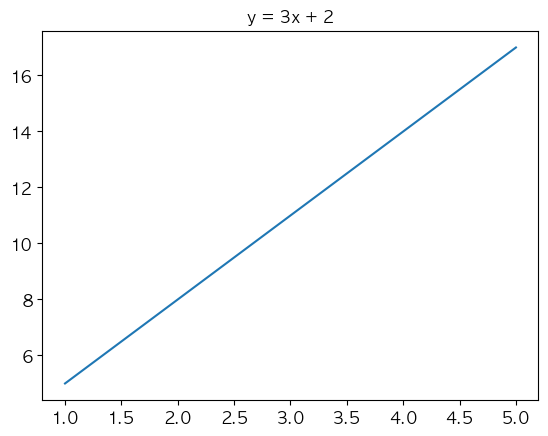

In [4]:
# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

#### 모델 구조

In [5]:
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [6]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### 입력 데이터 형태

In [7]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정 
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

2024-03-20 13:10:35.661833: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-20 13:10:35.661853: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-03-20 13:10:35.661859: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-03-20 13:10:35.661875: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-20 13:10:35.661886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### 단순 회귀 모델 정의

In [8]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

#### 모델의 요약

In [9]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

#### 컴파일

In [10]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [11]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [12]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [13]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#### 훈련

In [14]:
history = model.fit(x, y, epochs=1200)

Epoch 1/1200


2024-03-20 13:10:35.951988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 207.6765 - mae: 13.3760
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 121.0817 - mae: 10.2458
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 70.6182 - mae: 7.8561
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 41.2101 - mae: 6.0317
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 24.0722 - mae: 4.6389
Epoch 6/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.0846 - mae: 3.5756
Epoch 7/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.2640 - mae: 2.7637
Epoch 8/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8717 - mae: 2.1438
Epoch 9/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.8944 - mae: 1.6705
Epoch 10/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.7418 - mae: 1.3091
Epoch 11/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0697 - mae: 1.0331
Epoch 12/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6777 - mae: 0.8222
Epoch 13/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0875 - mae: 0.2540
Epoch 73/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0869 - mae: 0.2531
Epoch 74/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0864 - mae: 0.2522
Epoch 75/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0858 - mae: 0.2514
Epoch 76/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0852 - mae: 0.2505
Epoch 77/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0846 - mae: 0.2497
Epoch 78/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0841 - mae: 0.2488
Epoch 79/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0835 - mae: 0.2480
Epoch 80/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0829 - mae: 0.2472
Epoch 81/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0824 - mae: 0.2463
Epoch 82/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0818 - mae: 0.2455
Epoch 83/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0813 - mae: 0.2447
Epoch 84/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0545 - mae: 0.2004
Epoch 143/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0541 - mae: 0.1997
Epoch 144/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0538 - mae: 0.1990
Epoch 145/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0534 - mae: 0.1983
Epoch 146/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0530 - mae: 0.1977
Epoch 147/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0527 - mae: 0.1970
Epoch 148/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0523 - mae: 0.1963
Epoch 149/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0520 - mae: 0.1957
Epoch 150/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0516 - mae: 0.1950
Epoch 151/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0513 - mae: 0.1943
Epoch 152/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0509 - mae: 0.1937
Epoch 153/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0506 - mae: 0.1930
Epoch 154/1200
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0339 - mae: 0.1581
Epoch 213/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0337 - mae: 0.1575
Epoch 214/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0335 - mae: 0.1570
Epoch 215/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0332 - mae: 0.1565
Epoch 216/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0330 - mae: 0.1559
Epoch 217/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0328 - mae: 0.1554
Epoch 218/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0326 - mae: 0.1549
Epoch 219/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0323 - mae: 0.1544
Epoch 220/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0321 - mae: 0.1538
Epoch 221/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0319 - mae: 0.1533
Epoch 222/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0317 - mae: 0.1528
Epoch 223/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0315 - mae: 0.1523
Epoch 224/1200
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0211 - mae: 0.1247
Epoch 283/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210 - mae: 0.1243
Epoch 284/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0208 - mae: 0.1239
Epoch 285/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0207 - mae: 0.1234
Epoch 286/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0205 - mae: 0.1230
Epoch 287/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0204 - mae: 0.1226
Epoch 288/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0203 - mae: 0.1222
Epoch 289/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0201 - mae: 0.1218
Epoch 290/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0200 - mae: 0.1214
Epoch 291/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0199 - mae: 0.1210
Epoch 292/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0197 - mae: 0.1206
Epoch 293/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0196 - mae: 0.1201
Epoch 294/1200
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0131 - mae: 0.0984
Epoch 353/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mae: 0.0981
Epoch 354/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mae: 0.0977
Epoch 355/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0129 - mae: 0.0974
Epoch 356/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128 - mae: 0.0971
Epoch 357/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0127 - mae: 0.0967
Epoch 358/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0126 - mae: 0.0964
Epoch 359/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0125 - mae: 0.0961
Epoch 360/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0124 - mae: 0.0958
Epoch 361/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0124 - mae: 0.0954
Epoch 362/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0123 - mae: 0.0951
Epoch 363/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0122 - mae: 0.0948
Epoch 364/1200
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0082 - mae: 0.0776
Epoch 423/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0081 - mae: 0.0774
Epoch 424/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0081 - mae: 0.0771
Epoch 425/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0080 - mae: 0.0768
Epoch 426/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0080 - mae: 0.0766
Epoch 427/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0079 - mae: 0.0763
Epoch 428/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0079 - mae: 0.0761
Epoch 429/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0078 - mae: 0.0758
Epoch 430/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0077 - mae: 0.0755
Epoch 431/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0077 - mae: 0.0753
Epoch 432/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0076 - mae: 0.0750
Epoch 433/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0076 - mae: 0.0748
Epoch 434/1200
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0051 - mae: 0.0612
Epoch 493/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mae: 0.0610
Epoch 494/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - mae: 0.0608
Epoch 495/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0050 - mae: 0.0606
Epoch 496/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0050 - mae: 0.0604
Epoch 497/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0049 - mae: 0.0602
Epoch 498/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0049 - mae: 0.0600
Epoch 499/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0049 - mae: 0.0598
Epoch 500/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mae: 0.0596
Epoch 501/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0048 - mae: 0.0594
Epoch 502/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0048 - mae: 0.0592
Epoch 503/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - mae: 0.0590
Epoch 504/1200
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0032 - mae: 0.0483
Epoch 563/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0031 - mae: 0.0481
Epoch 564/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031 - mae: 0.0480
Epoch 565/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0031 - mae: 0.0478
Epoch 566/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031 - mae: 0.0477
Epoch 567/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031 - mae: 0.0475
Epoch 568/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0030 - mae: 0.0473
Epoch 569/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0030 - mae: 0.0472
Epoch 570/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0030 - mae: 0.0470
Epoch 571/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0030 - mae: 0.0469
Epoch 572/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0030 - mae: 0.0467
Epoch 573/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0029 - mae: 0.0465
Epoch 574/1200
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0020 - mae: 0.0381
Epoch 633/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0020 - mae: 0.0380
Epoch 634/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 - mae: 0.0379
Epoch 635/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0019 - mae: 0.0377
Epoch 636/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 - mae: 0.0376
Epoch 637/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 - mae: 0.0375
Epoch 638/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 - mae: 0.0373
Epoch 639/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0019 - mae: 0.0372
Epoch 640/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 - mae: 0.0371
Epoch 641/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 - mae: 0.0370
Epoch 642/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0018 - mae: 0.0368
Epoch 643/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0018 - mae: 0.0367
Epoch 644/1200
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0012 - mae: 0.0301
Epoch 703/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - mae: 0.0300
Epoch 704/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - mae: 0.0299
Epoch 705/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - mae: 0.0298
Epoch 706/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - mae: 0.0297
Epoch 707/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0012 - mae: 0.0296
Epoch 708/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0012 - mae: 0.0295
Epoch 709/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - mae: 0.0294
Epoch 710/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - mae: 0.0293
Epoch 711/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0012 - mae: 0.0292
Epoch 712/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0011 - mae: 0.0291
Epoch 713/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011 - mae: 0.0290
Epoch 714/1200
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.6910e-04 - mae: 0.0238
Epoch 772/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.6391e-04 - mae: 0.0237
Epoch 773/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.5875e-04 - mae: 0.0236
Epoch 774/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.5361e-04 - mae: 0.0236
Epoch 775/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4853e-04 - mae: 0.0235
Epoch 776/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4347e-04 - mae: 0.0234
Epoch 777/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.3847e-04 - mae: 0.0233
Epoch 778/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.3348e-04 - mae: 0.0232
Epoch 779/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2854e-04 - mae: 0.0232
Epoch 780/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2361e-04 - mae: 0.0231
Epoch 781/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.1873e-04 - mae: 0.0230
Epoch 782/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.1388e-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.8523e-04 - mae: 0.0189
Epoch 840/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8195e-04 - mae: 0.0188
Epoch 841/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.7871e-04 - mae: 0.0188
Epoch 842/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7546e-04 - mae: 0.0187
Epoch 843/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.7227e-04 - mae: 0.0187
Epoch 844/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6908e-04 - mae: 0.0186
Epoch 845/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6590e-04 - mae: 0.0185
Epoch 846/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6276e-04 - mae: 0.0185
Epoch 847/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.5965e-04 - mae: 0.0184
Epoch 848/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.5654e-04 - mae: 0.0183
Epoch 849/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.5345e-04 - mae: 0.0183
Epoch 850/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.5041e-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.0613e-04 - mae: 0.0150
Epoch 908/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.0407e-04 - mae: 0.0150
Epoch 909/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.0202e-04 - mae: 0.0149
Epoch 910/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9999e-04 - mae: 0.0149
Epoch 911/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9796e-04 - mae: 0.0148
Epoch 912/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9594e-04 - mae: 0.0148
Epoch 913/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9395e-04 - mae: 0.0147
Epoch 914/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9196e-04 - mae: 0.0147
Epoch 915/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9000e-04 - mae: 0.0146
Epoch 916/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.8804e-04 - mae: 0.0146
Epoch 917/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.8610e-04 - mae: 0.0145
Epoch 918/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.8416e-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.9315e-04 - mae: 0.0119
Epoch 976/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.9185e-04 - mae: 0.0119
Epoch 977/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.9055e-04 - mae: 0.0118
Epoch 978/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.8926e-04 - mae: 0.0118
Epoch 979/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8798e-04 - mae: 0.0118
Epoch 980/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8671e-04 - mae: 0.0117
Epoch 981/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8545e-04 - mae: 0.0117
Epoch 982/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8419e-04 - mae: 0.0116
Epoch 983/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8296e-04 - mae: 0.0116
Epoch 984/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.8172e-04 - mae: 0.0116
Epoch 985/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8050e-04 - mae: 0.0115
Epoch 986/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7928e-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.2186e-04 - mae: 0.0095
Epoch 1044/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2104e-04 - mae: 0.0094
Epoch 1045/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2021e-04 - mae: 0.0094
Epoch 1046/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1941e-04 - mae: 0.0094
Epoch 1047/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1860e-04 - mae: 0.0093
Epoch 1048/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1780e-04 - mae: 0.0093
Epoch 1049/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1701e-04 - mae: 0.0093
Epoch 1050/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1622e-04 - mae: 0.0093
Epoch 1051/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1543e-04 - mae: 0.0092
Epoch 1052/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1465e-04 - mae: 0.0092
Epoch 1053/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1387e-04 - mae: 0.0092
Epoch 1054/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.7400e-05 - mae: 0.0076
Epoch 1111/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.6876e-05 - mae: 0.0075
Epoch 1112/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.6360e-05 - mae: 0.0075
Epoch 1113/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.5849e-05 - mae: 0.0075
Epoch 1114/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.5336e-05 - mae: 0.0075
Epoch 1115/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4826e-05 - mae: 0.0074
Epoch 1116/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4322e-05 - mae: 0.0074
Epoch 1117/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.3816e-05 - mae: 0.0074
Epoch 1118/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.3317e-05 - mae: 0.0073
Epoch 1119/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2826e-05 - mae: 0.0073
Epoch 1120/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2336e-05 - mae: 0.0073
Epoch 1121/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.9166e-05 - mae: 0.0060
Epoch 1178/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.8832e-05 - mae: 0.0060
Epoch 1179/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8502e-05 - mae: 0.0060
Epoch 1180/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8174e-05 - mae: 0.0060
Epoch 1181/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.7850e-05 - mae: 0.0059
Epoch 1182/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.7529e-05 - mae: 0.0059
Epoch 1183/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.7208e-05 - mae: 0.0059
Epoch 1184/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6892e-05 - mae: 0.0059
Epoch 1185/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6571e-05 - mae: 0.0059
Epoch 1186/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6257e-05 - mae: 0.0058
Epoch 1187/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.5944e-05 - mae: 0.0058
Epoch 1188/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - los

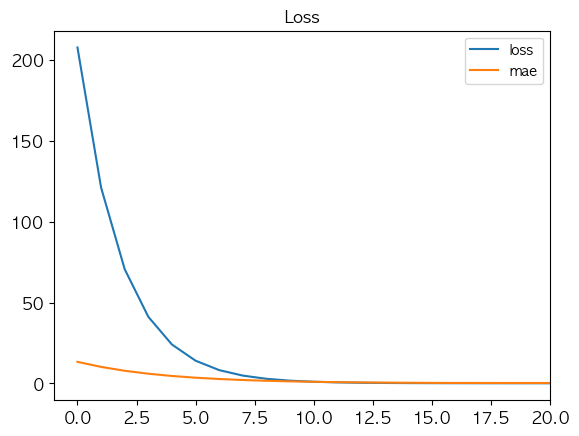

In [15]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

#### 검증

In [16]:
model.evaluate(x, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 4.1791e-05 - mae: 0.0055


[4.1791190596995875e-05, 0.0055487630888819695]

#### 예측

In [17]:
model.predict(np.array([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[32.026817]], dtype=float32)

### Sequential API 를 사용하여 이미지 분류기 만들기

#### 패션 MNIST 데이터 가져오기

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#### 훈련 데이터 확인

In [19]:
print('데이터 구조:', X_train_full.shape)

print('데이터 타입:', X_train_full.dtype)

데이터 구조: (60000, 28, 28)
데이터 타입: uint8


### 훈련 데이터 와 테스트 데이터를 나누고 0~1 사이로 스케일링

In [20]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

#### 이미지 출력

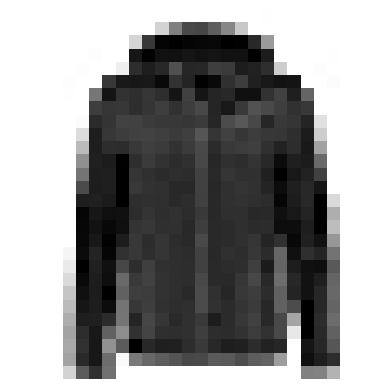

In [21]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

#### 레이블 생성

In [22]:
print(y_train) #0 ~ 9

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(class_names[y_train[0]])

[4 0 7 ... 3 0 5]
Coat


#### 데이터 개수 확인

In [23]:
print('학습 데이터:', X_train_full.shape)
print('테스트 데이터:', X_test.shape)
print('검증 데이터:', X_valid.shape)

학습 데이터: (60000, 28, 28)
테스트 데이터: (10000, 28, 28)
검증 데이터: (5000, 28, 28)


#### 샘플 이미지 출력

그림 저장: fashion_mnist_plot


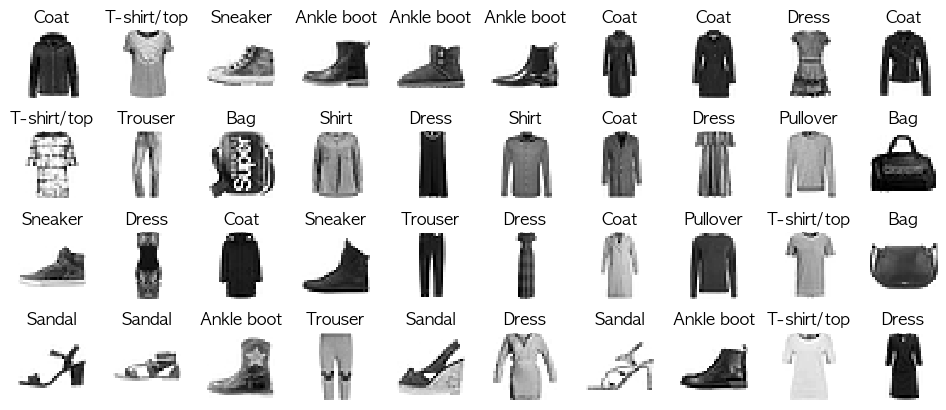

In [24]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

#### Flatten Layer

In [25]:
print(f'변경전 shape: {X_train.shape}')
print(f'1D로 shape 변경 후: {X_train.reshape(55000, -1).shape}')

변경전 shape: (55000, 28, 28)
1D로 shape 변경 후: (55000, 784)


In [26]:
print(f'변경전 shape: {X_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(X_train).shape}')

변경전 shape: (55000, 28, 28)
Flatten 적용 후: (55000, 784)


#### 활성화 함수

In [27]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

<Dense name=dense_10, built=False>

In [28]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

#### 시퀀셜 API를 사용하여 모델 만들기

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
#루프에서 많은 모델을 생성하는 경우이 전역 상태는 시간이 지남에 따라 증가하는 메모리를 소비하므로 이를 지울 수 있습니다. 
#clear_session() 호출 하면 전역 상태가 해제됩니다. 
#이는 특히 메모리가 제한된 경우 이전 모델 및 레이어의 혼란을 방지하는 데 도움이됩니다.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
#층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달해도 됨
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

#### 모델을 이미지로 출력

In [34]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### 인덱스를 이용해서 층의 이름을 확인하기

In [35]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [36]:
model.get_layer(hidden1.name) is hidden1

True

### 파라미터 확인

In [37]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00222301, -0.05513848, -0.01604777, ...,  0.03281485,
        -0.02458938, -0.01804486],
       [-0.00147102, -0.02906387, -0.05386122, ..., -0.02343461,
         0.02483021,  0.02542416],
       [ 0.05442956,  0.06783837, -0.03009931, ...,  0.03883875,
         0.02115963, -0.05940138],
       ...,
       [-0.02309328, -0.00901477, -0.03690937, ..., -0.02541183,
         0.06806834, -0.00251061],
       [ 0.07169414, -0.00226993,  0.05257572, ...,  0.07111362,
         0.06515665, -0.02683335],
       [-0.02868326,  0.02231395, -0.05195781, ..., -0.05786987,
        -0.05101307,  0.01331222]], dtype=float32)

In [38]:
weights.shape

(784, 300)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
biases.shape

(300,)

#### 손실 함수

In [41]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [42]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

#### 옵티마이저

In [43]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

In [44]:
# 문자열로 지정
model.compile(optimizer='adam')

#### 평가지표

In [45]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [46]:
# 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#### 모델 컴파일

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#### 모델 훈련

In [48]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6849 - loss: 0.9765 - val_accuracy: 0.8270 - val_loss: 0.5208
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8246 - loss: 0.5042 - val_accuracy: 0.8460 - val_loss: 0.4553
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8426 - loss: 0.4504 - val_accuracy: 0.8584 - val_loss: 0.4212
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8524 - loss: 0.4204 - val_accuracy: 0.8626 - val_loss: 0.4003
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8597 - loss: 0.3995 - val_accuracy: 0.8684 - val_loss: 0.3847
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8653 - loss: 0.3829 - val_accuracy: 0.8692 - val_loss: 0.3725
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8702 - loss: 0.3690 - val_accuracy: 0.8734 - val_loss: 0.3631
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8740 - loss: 0

#### History 객체

In [49]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [50]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [51]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### 학습 곡선

그림 저장: keras_learning_curves_plot


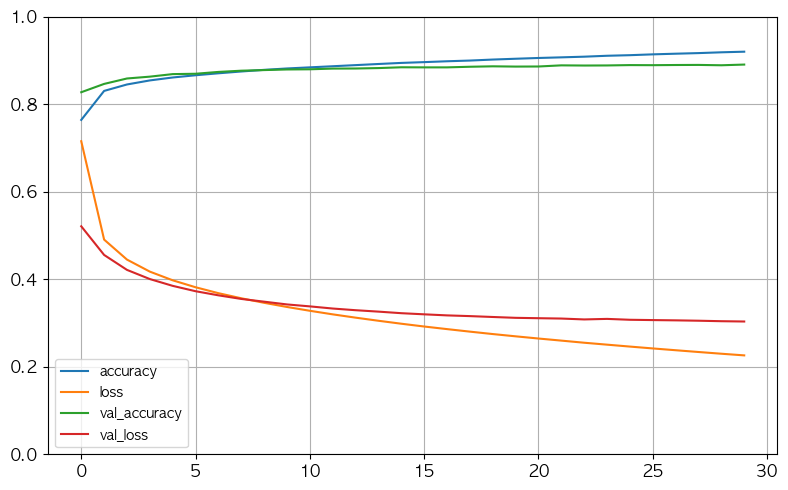

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

#### 일반화 오차

In [53]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8774 - loss: 0.3456


[0.3415443003177643, 0.8801000118255615]

#### 예측

In [54]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.03, 0.  , 0.93],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [55]:
# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([9, 2, 1])

In [56]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [57]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [58]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

그림 저장: fashion_mnist_images_plot


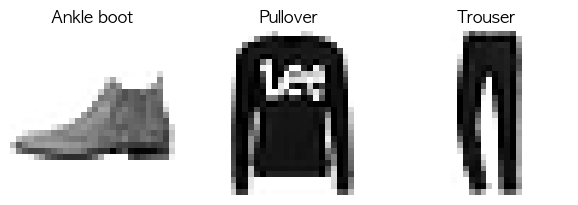

In [59]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### 회귀용 다층 퍼셉트론 만들기

#### 데이터 가져오기

In [60]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

#### 모델 만들기

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.2160 - val_loss: 0.9599
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8150 - val_loss: 0.6690
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6979 - val_loss: 0.6084
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6659 - val_loss: 0.5821
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6400 - val_loss: 0.5592
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6169 - val_loss: 0.5395
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5961 - val_loss: 0.5219
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5772 - val_loss: 0.5063
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5601 - val_loss: 0.4918
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5446 - val_loss: 0.4787
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5305 - val_loss: 0.4668
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

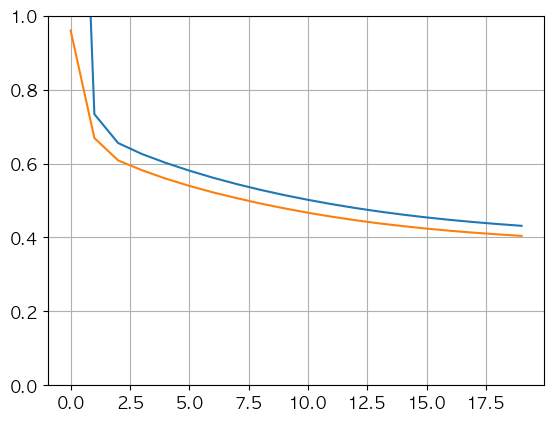

In [63]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.6483057],
       [1.5940869],
       [3.3326845]], dtype=float32)

### 함수형 API

#### 모델 만들기

In [65]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

#### 모델 확인

In [66]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        930 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

### 모델 훈련

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

print(y_pred)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 1.5149 - loss: 2.4457 - val_RootMeanSquaredError: 0.8359 - val_loss: 0.6984
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.7291 - loss: 0.5333 - val_RootMeanSquaredError: 1.1592 - val_loss: 1.3431
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.6524 - loss: 0.4262 - val_RootMeanSquaredError: 0.9637 - val_loss: 0.9283
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.6273 - loss: 0.3938 - val_RootMeanSquaredError: 1.1607 - val_loss: 1.3467
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.6165 - loss: 0.3804 - val_RootMeanSquaredError: 1.2803 - val_loss: 1.6383
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.6062 - loss: 0.3677 - val_RootMeanSquaredError: 1.1186 - val_loss: 1.2508
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.597

#### 2가지 입력을 이용

In [68]:
input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

#### 모델을 훈련

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))
print(y_pred)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - RootMeanSquaredError: 1.9580 - loss: 3.9657 - val_RootMeanSquaredError: 0.9936 - val_loss: 0.9871
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.8790 - loss: 0.7744 - val_RootMeanSquaredError: 0.7602 - val_loss: 0.5777
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.7518 - loss: 0.5655 - val_RootMeanSquaredError: 0.6840 - val_loss: 0.4678
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.6958 - loss: 0.4844 - val_RootMeanSquaredError: 0.6636 - val_loss: 0.4403
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.6617 - loss: 0.4380 - val_RootMeanSquaredError: 0.7939 - val_loss: 0.6300
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.6389 - loss: 0.4083 - val_RootMeanSquaredError: 0.6202 - val_loss: 0.3846
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - RootMeanSquaredError: 0.624

#### 보조 출력 추가

In [70]:
input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

#### 보조 출력이 추가된 모델 컴파일

In [71]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

#### 모델 훈련

In [72]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - dense_13_RootMeanSquaredError: 1.5124 - dense_14_RootMeanSquaredError: 2.0204 - loss: 2.5674 - val_dense_13_RootMeanSquaredError: 0.7324 - val_dense_14_RootMeanSquaredError: 1.1225 - val_loss: 0.6087
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - dense_13_RootMeanSquaredError: 0.7325 - dense_14_RootMeanSquaredError: 0.9854 - loss: 0.5807 - val_dense_13_RootMeanSquaredError: 0.6479 - val_dense_14_RootMeanSquaredError: 0.8276 - val_loss: 0.4462
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - dense_13_RootMeanSquaredError: 0.6659 - dense_14_RootMeanSquaredError: 0.8131 - loss: 0.4654 - val_dense_13_RootMeanSquaredError: 0.6217 - val_dense_14_RootMeanSquaredError: 0.7477 - val_loss: 0.4037
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - dense_13_RootMeanSquaredError: 0.6417 - dense_14_RootMeanSquaredError: 0.7536 - loss: 0.4276 - val_dense_13_RootMeanSquaredError: 0.6275 - val_dense_14_RootMeanSquaredError: 0.7197

#### 모델 평가

In [73]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
print(eval_results)

y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(y_pred_main)
print(y_pred_aux)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - dense_13_RootMeanSquaredError: 0.5762 - dense_14_RootMeanSquaredError: 0.6315 - loss: 0.3387
[0.3331133723258972, 0.5716512799263, 0.6260906457901001]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0.4176553]
 [1.2574017]
 [3.5461123]]
[[0.6031866]
 [1.1878542]
 [3.1836054]]


### 상속(SubClassing)을 이용한 방식

In [74]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # 모델 이름을 지정하는 데 필요합니다
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

In [75]:
model = WideAndDeepModel(30, activation="relu", name="my_model")

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
print(eval_results)
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - RootMeanSquaredError: 1.5600 - RootMeanSquaredError_1: 1.8993 - loss: 2.6566 - val_RootMeanSquaredError: 1.7876 - val_RootMeanSquaredError_1: 3.1843 - val_loss: 3.8880
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - RootMeanSquaredError: 0.7352 - RootMeanSquaredError_1: 0.9508 - loss: 0.5777 - val_RootMeanSquaredError: 1.1751 - val_RootMeanSquaredError_1: 2.4872 - val_loss: 1.8605
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - RootMeanSquaredError: 0.6773 - RootMeanSquaredError_1: 0.8094 - loss: 0.4787 - val_RootMeanSquaredError: 0.8493 - val_RootMeanSquaredError_1: 2.1300 - val_loss: 1.1024
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - RootMeanSquaredError: 0.6594 - RootMeanSquaredError_1: 0.7730 - loss: 0.4514 - val_RootMeanSquaredError: 0.6588 - val_RootMeanSquaredError_1: 1.7871 - val_loss: 0.7097
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - RootMeanSquaredError: 0.6456 - RootMeanSquaredError_1

### 모델 저장 과 복원

In [76]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

model.save("mymodel.keras")

model = keras.models.load_model("mymodel.keras")

model.predict(X_new)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.4126 - val_loss: 1.3837
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8755 - val_loss: 0.6419
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6689 - val_loss: 0.5727
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6122 - val_loss: 0.5416
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5759 - val_loss: 0.5187
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5474 - val_loss: 0.5013
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5241 - val_loss: 0.4881
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5045 - val_loss: 0.4773
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4877 - val_loss: 0.4644
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4735 - val_loss: 0.4502
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.5587914],
       [1.4111913],
       [3.001721 ]], dtype=float32)

In [77]:
model.save_weights("my_keras_model.weights.h5")

model.load_weights("my_keras_model.weights.h5")

### 콜백

#### 모델 체크 포인트

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

In [79]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras.keras") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.6483 - val_loss: 0.8227
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7538 - val_loss: 0.6247
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6723 - val_loss: 0.5700
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6151 - val_loss: 0.5292
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5711 - val_loss: 0.4929
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5365 - val_loss: 0.4640
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5089 - val_loss: 0.4428
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4869 - val_loss: 0.4291
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4695 - val_loss: 0.4213
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4557 - val_loss: 0.4183
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4202


#### 조기 종료

In [80]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4448 - val_loss: 0.4180
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4361 - val_loss: 0.4189
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4291 - val_loss: 0.4199
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4231 - val_loss: 0.4203
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4178 - val_loss: 0.4201
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4134 - val_loss: 0.4195
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4094 - val_loss: 0.4181
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4059 - val_loss: 0.4164
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4026 - val_loss: 0.4138
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3997 - val_loss: 0.4112
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3970 - val_loss: 0.4086
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3436 - val_loss: 0.3497
Epoch 69/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3432 - val_loss: 0.3493
Epoch 70/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3427 - val_loss: 0.3480
Epoch 71/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3423 - val_loss: 0.3483
Epoch 72/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3419 - val_loss: 0.3480
Epoch 73/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3415 - val_loss: 0.3467
Epoch 74/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3410 - val_loss: 0.3470
Epoch 75/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3406 - val_loss: 0.3470
Epoch 76/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3402 - val_loss: 0.3454
Epoch 77/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3398 - val_loss: 0.3458
Epoch 78/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3394 - val_loss: 0.3461
Epoch 79/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 

#### 학습률 스케줄러

In [84]:
def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
        # 학습률 감소 적용
        lr = lr - 0.0001
        return lr

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [85]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
# 초기 학습률 확인(0.01)
print(round(model.optimizer.learning_rate.numpy(), 5))

0.001


In [87]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

# 최종 학습률 스케줄러 확인
round(model.optimizer.learning_rate.numpy(), 5)

learning_rate: 0.00100
Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: 0.0010
learning_rate: 0.00100
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: 0.0010
learning_rate: 0.00100
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: 0.0010
learning_rate: 0.00100
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: 0.0010
learning_rate: 0.00100
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: 0.0010
learning_rate: 0.00100
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: 9.0000e-04
learning_rate: 0.00090
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: 8.0000e-04
learning_rate: 0.00080
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_lo

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: -0.0035
learning_rate: -0.00350
Epoch 51/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: -0.0036
learning_rate: -0.00360
Epoch 52/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: nan - val_loss: nan - learning_rate: -0.0037
learning_rate: -0.00370
Epoch 53/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: -0.0038
learning_rate: -0.00380
Epoch 54/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: nan - val_loss: nan - learning_rate: -0.0039
learning_rate: -0.00390
Epoch 55/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: -0.0040
learning_rate: -0.00400
Epoch 56/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: nan - val_loss: nan - learning_rate: -0.0041
learning_rate: -0.00410
Epoch 57/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rat

learning_rate: -0.00840
Epoch 100/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan - learning_rate: -0.0085


-0.0085

#### 사용자 정의 콜백

In [88]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [89]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan
val/train: nan
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan


## 그라디언트 소실과 폭주 문제

### 로지스틱 함수의 수렴

In [119]:
def logit(z):
    return 1 / (1 + np.exp(-z))

그림 저장: sigmoid_saturation_plot


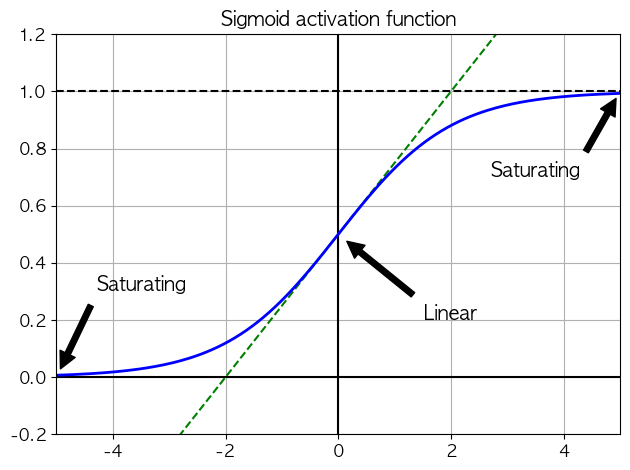

In [120]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

### 글로럿 과 He 초기화

In [121]:
#모든 초기화 방식을 확인
[name for name in dir(keras.initializers) if not name.startswith("_")]

#글로럿 초기화
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")


#균등분포 He 초기화
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

<Dense name=dense_3, built=False>

### 활성화 함수

#### LeakyReLU

그림 저장: leaky_relu_plot


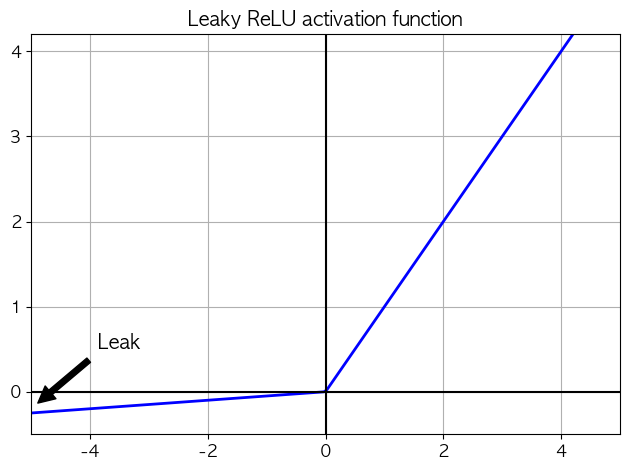

In [122]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [123]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'leaky_relu',
 'linear',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

#### LeakyReLU를 사용해 패션 MNIST에서 신경망을 훈련

In [126]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#모델 생성
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

#모델 컴파일
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4698 - loss: 1.7095 - val_accuracy: 0.7302 - val_loss: 0.8683
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7303 - loss: 0.8305 - val_accuracy: 0.7768 - val_loss: 0.7065
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7692 - loss: 0.6992 - val_accuracy: 0.8006 - val_loss: 0.6323
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7932 - loss: 0.6328 - val_accuracy: 0.8114 - val_loss: 0.5875
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8057 - loss: 0.5908 - val_accuracy: 0.8216 - val_loss: 0.5567
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8132 - loss: 0.5613 - val_accuracy: 0.8286 - val_loss: 0.5340
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8194 - loss: 0.5393 - val_accuracy: 0.8320 - val_loss: 0.5163
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8253 - loss: 0

#### PReLU

In [127]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5184 - loss: 1.6364 - val_accuracy: 0.7336 - val_loss: 0.8622
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7405 - loss: 0.8197 - val_accuracy: 0.7848 - val_loss: 0.6897
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7788 - loss: 0.6819 - val_accuracy: 0.8046 - val_loss: 0.6164
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7981 - loss: 0.6165 - val_accuracy: 0.8176 - val_loss: 0.5728
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8108 - loss: 0.5758 - val_accuracy: 0.8256 - val_loss: 0.5430
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8188 - loss: 0.5475 - val_accuracy: 0.8284 - val_loss: 0.5211
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8236 - loss: 0.5262 - val_accuracy: 0.8338 - val_loss: 0.5039
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8292 - loss: 0

#### elu

그림 저장: elu_plot


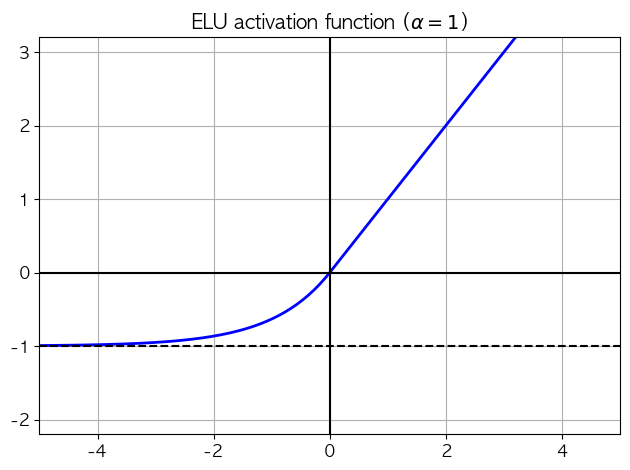

In [128]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [129]:
#TensorFlow에서 쉽게 ELU를 적용할 수 있는데 층을 만들 때 활성화 함수로 지정
keras.layers.Dense(10, activation="elu")

<Dense name=dense_16, built=False>

#### SELU

In [130]:
from scipy.special import erfc

# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

그림 저장: selu_plot


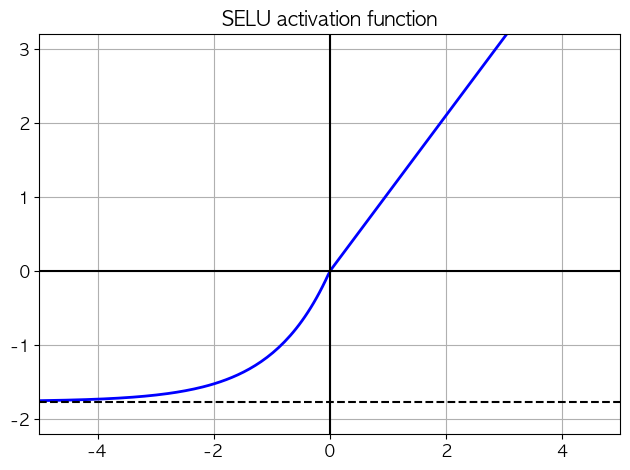

In [131]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [132]:
#기본적으로 SELU 하이퍼 파라미터(scale과 alpha)는 각 뉴런의 평균 출력이 0에 가깝고 표준 편차는 1에 가깝도록 조정
#입력은 평균이 0이고 표준 편차 1로 표준화 되었다고 가정
#이 활성화 함수를 사용하면 1,000개의 층이 있는 심층 신경망도 모든 층에 걸쳐 거의 평균이 0이고 표준 편차를 1로 유지
#이를 통해 그라디언트 폭주와 소실 문제를 피할 수 있음

np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 표준화된 입력
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))


Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.82
Layer 900: mean 0.02, std deviation 0.99


In [133]:
#은닉층에 적용
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

<Dense name=dense_17, built=False>

#### SELU를 패션 MNIST에 적용

In [134]:

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [135]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 353s 203ms/step - accuracy: 0.4208 - loss: 1.4843 - val_accuracy: 0.6510 - val_loss: 0.9524
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 346s 201ms/step - accuracy: 0.7045 - loss: 0.7909 - val_accuracy: 0.6462 - val_loss: 0.8875
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 347s 202ms/step - accuracy: 0.7094 - loss: 0.7405 - val_accuracy: 0.7266 - val_loss: 0.6901
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 350s 204ms/step - accuracy: 0.7164 - loss: 0.7402 - val_accuracy: 0.7718 - val_loss: 0.6392
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 350s 203ms/step - accuracy: 0.7666 - loss: 0.6262 - val_accuracy: 0.7854 - val_loss: 0.5584


In [137]:
#ReLU를 사용한 경우
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 112s 63ms/step - accuracy: 0.1884 - loss: 2.0549 - val_accuracy: 0.4234 - val_loss: 1.3552
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 104s 60ms/step - accuracy: 0.4587 - loss: 1.2881 - val_accuracy: 0.5520 - val_loss: 1.1008
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 105s 61ms/step - accuracy: 0.5756 - loss: 1.0354 - val_accuracy: 0.5788 - val_loss: 1.0172
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 105s 61ms/step - accuracy: 0.6582 - loss: 0.8701 - val_accuracy: 0.5912 - val_loss: 1.0004
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 105s 61ms/step - accuracy: 0.7192 - loss: 0.7438 - val_accuracy: 0.6482 - val_loss: 0.9563


### 배치 정규화

In [138]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_321 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_322 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_323 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

#### 첫번째 배치 정규화 층 파라미터 확인

In [139]:
#파라미터 확인
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [140]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.6282 - loss: 1.1388 - val_accuracy: 0.8106 - val_loss: 0.5587
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8003 - loss: 0.5852 - val_accuracy: 0.8340 - val_loss: 0.4837
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8239 - loss: 0.5142 - val_accuracy: 0.8478 - val_loss: 0.4485
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8379 - loss: 0.4759 - val_accuracy: 0.8526 - val_loss: 0.4266
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8462 - loss: 0.4499 - val_accuracy: 0.8596 - val_loss: 0.4115
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8538 - loss: 0.4300 - val_accuracy: 0.8624 - val_loss: 0.4003
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8592 - loss: 0.4137 - val_accuracy: 0.8646 - val_loss: 0.3915
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8636 -

#### 활성화 전에 BN 적용

In [141]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [142]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.5472 - loss: 1.4103 - val_accuracy: 0.7790 - val_loss: 0.6848
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7731 - loss: 0.7155 - val_accuracy: 0.8120 - val_loss: 0.5616
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8019 - loss: 0.6078 - val_accuracy: 0.8268 - val_loss: 0.5053
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8182 - loss: 0.5526 - val_accuracy: 0.8380 - val_loss: 0.4717
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8285 - loss: 0.5175 - val_accuracy: 0.8472 - val_loss: 0.4488
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8358 - loss: 0.4920 - val_accuracy: 0.8534 - val_loss: 0.4319
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8415 - loss: 0.4721 - val_accuracy: 0.8580 - val_loss: 0.4189
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8465 -

## 사전 훈련

### 사전 훈련된 모델 사용 

#### 데이터 셋 분할

In [143]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [144]:
X_train_A.shape

(43986, 28, 28)

In [145]:
X_train_B.shape

(200, 28, 28)

In [146]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [147]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

#### 모델 A 생성

In [149]:
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.7176 - loss: 0.8422 - val_accuracy: 0.8672 - val_loss: 0.3813
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8710 - loss: 0.3687 - val_accuracy: 0.8849 - val_loss: 0.3287
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8845 - loss: 0.3242 - val_accuracy: 0.8889 - val_loss: 0.3053
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8923 - loss: 0.3025 - val_accuracy: 0.8961 - val_loss: 0.2915
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8976 - loss: 0.2883 - val_accuracy: 0.8996 - val_loss: 0.2821
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9011 - loss: 0.2777 - val_accuracy: 0.9021 - val_loss: 0.2751
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9045 - loss: 0.2692 - val_accuracy: 0.9041 - val_loss: 0.2696
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9075 -

#### 모델 저장

In [150]:
model_A.save("my_model_A.h5")

#### 모델 B 생성 및 훈련

In [151]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.3866 - loss: 0.9054 - val_accuracy: 0.6653 - val_loss: 0.6187
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7058 - loss: 0.5711 - val_accuracy: 0.7850 - val_loss: 0.4675
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8230 - loss: 0.4233 - val_accuracy: 0.8631 - val_loss: 0.3720
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8967 - loss: 0.3342 - val_accuracy: 0.8955 - val_loss: 0.3098
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9216 - loss: 0.2763 - val_accuracy: 0.9249 - val_loss: 0.2658
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9598 - loss: 0.2351 - val_accuracy: 0.9422 - val_loss: 0.2334
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9654 - loss: 0.2047 - val_accuracy: 0.9513 - val_loss: 0.2086
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9717 - loss: 0.1816 - val_accuracy: 0.9594 - val_loss: 0.1889

#### 모델 B 확인

In [152]:
model_B.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_339 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_340 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_341 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_342 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_343 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_344 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,803 (1.05 MB)

 Trainable params: 275,801 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#### 모델 B 에서 모델 A를 재사용

In [ ]:
# 모델 B 에서 모델 A를 재사용
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

#### 마지막 점수

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

In [ ]:
#마지막 점수
model_B_on_A.evaluate(X_test_B, y_test_B)

In [ ]:
(100 - 97.05) / (100 - 99.35)

## 고속 옵티마이저

### AdaGrad 적용

In [154]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

### Adam

In [156]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### Nadam

In [157]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## 학습률 스케줄링

### 거듭 제곱 스케줄링

In [158]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7919 - loss: 0.6000 - val_accuracy: 0.8574 - val_loss: 0.3995
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8657 - loss: 0.3816 - val_accuracy: 0.8658 - val_loss: 0.3714
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8775 - loss: 0.3449 - val_accuracy: 0.8712 - val_loss: 0.3563
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8858 - loss: 0.3217 - val_accuracy: 0.8744 - val_loss: 0.3465
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8920 - loss: 0.3040 - val_accuracy: 0.8788 - val_loss: 0.3395
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8970 - loss: 0.2894 - val_accuracy: 0.8794 - val_loss: 0.3348
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9012 - loss: 0.2768 - val_accuracy: 0.8816 - val_loss: 0.3315
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9045 - loss: 0

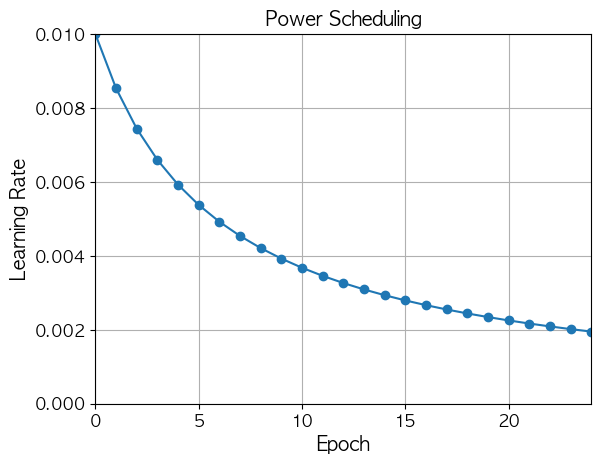

In [159]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### 지수 기반 스케줄링

In [160]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [161]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.7585 - loss: 0.9960 - val_accuracy: 0.7834 - val_loss: 0.8002 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8037 - loss: 0.6497 - val_accuracy: 0.8066 - val_loss: 0.6538 - learning_rate: 0.0089
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8151 - loss: 0.6231 - val_accuracy: 0.8414 - val_loss: 0.6112 - learning_rate: 0.0079
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8321 - loss: 0.5564 - val_accuracy: 0.8438 - val_loss: 0.5536 - learning_rate: 0.0071
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8463 - loss: 0.5053 - val_accuracy: 0.8306 - val_loss: 0.5788 - learning_rate: 0.0063
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8508 - loss: 0.4815 - val_accuracy: 0.8624 - val_loss: 0.5780 - learning_rate: 0.0056
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accura

In [162]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

KeyError: 'lr'

In [ ]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # 노트: 에포크마다 `batch` 매개변수가 재설정됩니다
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # 20 에포크 동안 스텝 횟수 (배치 크기 = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

In [ ]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

## 규제

### l2 규제

In [ ]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


### 가독성 높이기

In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


### Dropout

#### 그대로 전달

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


#### 알파 드롭아웃

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


In [ ]:
model.evaluate(X_test_scaled, y_test)

In [ ]:
model.evaluate(X_train_scaled, y_train)

In [ ]:
history = model.fit(X_train_scaled, y_train)

#### 몬테 카를로 Dropout

In [ ]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    
tf.random.set_seed(42)
np.random.seed(42)

mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

mc_model.summary()

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

mc_model.set_weights(model.get_weights())

np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

#### 맥스 노름 규제

In [ ]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


## 사용자 정의 모델

### 사용자 정의 손실 함수

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 후버 손실 함수
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)


In [ ]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [ ]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


In [ ]:
model.save("my_model_with_a_custom_loss.h5")

model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


### 손실 함수 수정

In [ ]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [ ]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

In [ ]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


### keras.losses.Loss 클래스를 상속

In [ ]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


In [ ]:
model.save("my_model_with_a_custom_loss_class.h5")

model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

In [ ]:
model.loss.threshold

### 활성화 함수, 초기화, 규제, 제한을 커스터마이징

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def my_softplus(z): # tf.nn.softplus(z) 값을 반환합니다
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # tf.nn.relu(weights) 값을 반환합니다
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [ ]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


In [ ]:
model.save("my_model_with_many_custom_parts.h5")

model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })


#### 상속 이용

In [ ]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

In [ ]:
model.save("my_model_with_many_custom_parts.h5")

model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })


### 사용자 정의 지표

#### 후버 함수

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

model.fit(X_train_scaled, y_train, epochs=2)


#### precision = keras.metrics.Precision()

In [ ]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
precision.result()

#### 스트리밍 지표

In [ ]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # 기본 매개변수 처리 (예를 들면, dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [ ]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 


In [ ]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

In [ ]:
m.variables

In [ ]:
m.reset_states()
m.variables

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

In [ ]:
model.save("my_model_with_a_custom_metric.h5")

model = keras.models.load_model("my_model_with_a_custom_metric.h5",
                                custom_objects={"huber_fn": create_huber(2.0),
                                                "HuberMetric": HuberMetric})

model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

In [ ]:
model.metrics[-1].threshold

#### 간단하게 작성

In [ ]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold} 

### 사용자 정의 층

#### 지수를 사용하는 층

In [ ]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

exponential_layer([-1., 0., 1.])

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

#### 상태가 있는 층

In [ ]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

In [ ]:
model.save("my_model_with_a_custom_layer.h5")
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [ ]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))


In [ ]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [ ]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)


### 사용자 정의 모델

In [ ]:
X_new_scaled = X_test_scaled

class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [ ]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)


In [ ]:
model.save("my_custom_model.ckpt")

model = keras.models.load_model("my_custom_model.ckpt")

history = model.fit(X_train_scaled, y_train, epochs=5)